In [38]:
import xarray as xr
import math 
import numpy as np 
import matplotlib.pyplot as plt 
import s3fs

Fetching the U-data

In [2]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path = 's3://velocity-u.zarr/'
remote_files = fsg.glob(data_path)

store = s3fs.S3Map(root=data_path, s3=fsg, check=False)
du = xr.open_zarr(store=store, consolidated=True)
du = du.rename({'depthu' : 'depth'})
du 

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, depth: 75, time_counter: 72, x: 1580, y: 1801)
Coordinates:
  * depth                 (depth) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    nav_lat               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    time_centered         (time_counter) object dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter          (time_counter) object 2000-01-03 12:00:00 ... 2000-...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    depthu_bounds         (time_counter, depth, axis_nbounds) float32 dask.array<chunksize=(1, 75, 2), meta=np.ndarray>
    sozotaux              (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(72, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(72, 2), meta=np.ndarray>
    utau_atmoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    utau_iceoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    uwspd10               (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    vozocrtx              (time_counter, depth, y, x) float32 dask.array<chunksize=(1, 75, 1801, 1580), meta=np.ndarray>
Attributes:
    CASE:              REF08
    CONFIG:            CREG12.L75
    Conventions:       CF-1.5
    description:       ocean U grid variables
    name:              /scratch/cnt0028/lpo7420/talandic/CREG12.L75-REF08-XIO...
    output_frequency:  5d
    production:        An IPSL model
    start_date:        19790101
    timeStamp:         2020-May-14 08:39:48 CEST
    title:             ocean U grid variables

In [3]:
u = du.vozocrtx
u.shape

(72, 75, 1801, 1580)

Fetching V-data

In [4]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path = 's3://velocity-v.zarr/'
remote_files = fsg.glob(data_path)

store = s3fs.S3Map(root=data_path, s3=fsg, check=False)
dv = xr.open_zarr(store=store, consolidated=True)
dv = dv.rename({'depthv' : 'depth'})
dv 

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, depth: 75, time_counter: 73, x: 1580, y: 1801)
Coordinates:
  * depth                 (depth) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    nav_lat               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    nav_lon               (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    time_centered         (time_counter) object dask.array<chunksize=(73,), meta=np.ndarray>
  * time_counter          (time_counter) object 2000-01-03 12:00:00 ... 2000-...
Dimensions without coordinates: axis_nbounds, x, y
Data variables:
    depthv_bounds         (time_counter, depth, axis_nbounds) float32 dask.array<chunksize=(1, 75, 2), meta=np.ndarray>
    sometauy              (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    time_centered_bounds  (time_counter, axis_nbounds) object dask.array<chunksize=(73, 2), meta=np.ndarray>
    time_counter_bounds   (time_counter, axis_nbounds) object dask.array<chunksize=(73, 2), meta=np.ndarray>
    vomecrty              (time_counter, depth, y, x) float32 dask.array<chunksize=(1, 75, 1801, 1580), meta=np.ndarray>
    vtau_atmoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    vtau_iceoce           (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
    vwspd10               (time_counter, y, x) float32 dask.array<chunksize=(1, 1801, 1580), meta=np.ndarray>
Attributes:
    CASE:              REF08
    CONFIG:            CREG12.L75
    Conventions:       CF-1.5
    description:       ocean V grid variables
    name:              /scratch/cnt0028/lpo7420/talandic/CREG12.L75-REF08-XIO...
    output_frequency:  5d
    production:        An IPSL model
    start_date:        19790101
    timeStamp:         2020-May-14 08:39:49 CEST
    title:             ocean V grid variables

In [37]:
v = dv.vomecrty
v.shape

(73, 75, 1801, 1580)

Fetching the variance and the covariance 

In [6]:
def open_s3fs(path):
    # open the data with s3fs from the databucket 
    fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
    data_path = f's3://data/{path}/*'
    remote_files = fsg.glob(data_path)
    fileset = [fsg.open(file) for file in remote_files]
    #open the dataset 
    dset = xr.open_mfdataset(fileset, combine='by_coords',compat='override')
    # rename variabel
    dset = dset.rename({'__xarray_dataarray_variable__' : 'vel'})
    return dset

In [7]:
dset = open_s3fs('PC-data')
dset

<xarray.Dataset>
Dimensions:        (depth: 75, x: 1580, y: 1801)
Coordinates:
  * depth          (depth) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    time_centered  object ...
    time_counter   object ...
    nav_lat        (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
Dimensions without coordinates: x, y
Data variables:
    vel            (depth, y, x) float32 dask.array<chunksize=(75, 1801, 1580), meta=np.ndarray>
    mbathy         (y, x) int16 dask.array<chunksize=(1801, 1580), meta=np.ndarray>
    vomecrty       (depth, y, x) float32 dask.array<chunksize=(75, 1801, 1580), meta=np.ndarray>
    vozocrtx       (depth, y, x) float32 dask.array<chunksize=(75, 1801, 1580), meta=np.ndarray>

In [8]:
# rewriting the name of the variables 
vvar = dset.vomecrty
uvar = dset.vozocrtx
covar = dset.vel

Choosing a point 

In [9]:
# choosing a point 
x = 1020 
y = 1540 

In [10]:
uvar = uvar[:,y,x]
vvar = vvar[:,y,x]
cov = covar[:,y,x]
v = v[:,:,y,x]
u = u[:,:,y,x]

In [40]:
'c stands for centralized data. The mean is subtracted'

u_c = u - u.mean()
v_c = v - v.mean()

u_c = u_c.to_dataset()
v_c = v_c.to_dataset()
rådata_c = xr.merge([u_c,v_c], compat='override')
rådata_c

<xarray.Dataset>
Dimensions:        (depth: 75, time_counter: 73, x: 1580, y: 1801)
Coordinates:
  * time_counter   (time_counter) object 2000-01-03 12:00:00 ... 2000-12-29 1...
  * depth          (depth) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    nav_lat        float32 dask.array<chunksize=(), meta=np.ndarray>
    nav_lon        float32 dask.array<chunksize=(), meta=np.ndarray>
    time_centered  (time_counter) object dask.array<chunksize=(73,), meta=np.ndarray>
Dimensions without coordinates: x, y
Data variables:
    vozocrtx       (time_counter, depth) float32 dask.array<chunksize=(1, 75), meta=np.ndarray>
    vomecrty       (time_counter, depth, y, x) float32 dask.array<chunksize=(1, 75, 1801, 1580), meta=np.ndarray>

In [12]:
'The original data without subtracted the mean'

u = u.to_dataset()
v = v.to_dataset()
rådata = xr.merge([u,v], compat='override')
rådata

<xarray.Dataset>
Dimensions:        (depth: 75, time_counter: 73)
Coordinates:
  * time_counter   (time_counter) object 2000-01-03 12:00:00 ... 2000-12-29 1...
  * depth          (depth) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    nav_lat        float32 dask.array<chunksize=(), meta=np.ndarray>
    nav_lon        float32 dask.array<chunksize=(), meta=np.ndarray>
    time_centered  (time_counter) object dask.array<chunksize=(73,), meta=np.ndarray>
Data variables:
    vozocrtx       (time_counter, depth) float32 dask.array<chunksize=(1, 75), meta=np.ndarray>
    vomecrty       (time_counter, depth) float32 dask.array<chunksize=(1, 75), meta=np.ndarray>

In [33]:
A = xr.DataArray([[uvar,cov],[cov,vvar]], dims=["i", "j", "depth"])
A

<xarray.DataArray (i: 2, j: 2, depth: 75)>
array([[[ 3.7402911e-03,  3.7371512e-03,  3.7231022e-03,  3.6977180e-03,
          3.6601122e-03,  3.6091250e-03,  3.5600993e-03,  3.5149539e-03,
          3.4783073e-03,  3.4478093e-03,  3.4198896e-03,  3.3918596e-03,
          3.3537894e-03,  3.2923282e-03,  3.2011569e-03,  3.0907469e-03,
          2.9864272e-03,  2.9014209e-03,  2.8259214e-03,  2.7560238e-03,
          2.6977502e-03,  2.6414162e-03,  2.6088969e-03,  2.5844239e-03,
          2.5508753e-03,  2.5160210e-03,  2.4731662e-03,  2.4318497e-03,
          2.3800388e-03,  2.3235409e-03,  2.2431586e-03,  2.1593585e-03,
          2.0817711e-03,  2.0123546e-03,  1.9423553e-03,  1.8659427e-03,
          1.7962856e-03,  1.7271105e-03,  1.6513871e-03,  1.5817175e-03,
          1.5283062e-03,  1.4802058e-03,  1.4088440e-03,  1.2733538e-03,
          1.0194464e-03,  6.8185717e-04,  3.6734814e-04,  1.5814712e-04,
          5.3301454e-05,  1.3327581e-05,  1.8825897e-06,  1.0110375e-06,
          7.4617788e-07,  9.0269356e-07,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-2.8138307e-05, -2.9813506e-05, -2.8374703e-05, -2.6684203e-05,
...
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 4.9840803e-03,  4.9650138e-03,  4.9472195e-03,  4.9289190e-03,
          4.9050297e-03,  4.8764725e-03,  4.8324480e-03,  4.7768392e-03,
          4.7156583e-03,  4.6538883e-03,  4.5943097e-03,  4.5375284e-03,
          4.4817394e-03,  4.4267350e-03,  4.3708533e-03,  4.3122326e-03,
          4.2504240e-03,  4.1910321e-03,  4.1371360e-03,  4.0899240e-03,
          4.0386254e-03,  3.9664339e-03,  3.8783604e-03,  3.7932892e-03,
          3.7006976e-03,  3.6109379e-03,  3.5164147e-03,  3.4137643e-03,
          3.3088517e-03,  3.2003256e-03,  3.0622778e-03,  2.8835095e-03,
          2.7415049e-03,  2.5779598e-03,  2.4225060e-03,  2.2608689e-03,
          2.1140345e-03,  1.9800053e-03,  1.8610504e-03,  1.7532762e-03,
          1.6387597e-03,  1.5640416e-03,  1.4908117e-03,  1.3887128e-03,
          1.2010173e-03,  9.2341221e-04,  5.9158530e-04,  2.9656512e-04,
          1.2333324e-04,  5.0470197e-05,  9.8601668e-06,  3.3481190e-06,
          1.9424724e-06,  1.6349912e-06,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00]]], dtype=float32)
Dimensions without coordinates: i, j, depth

In [34]:
'Function to calculate the eigenvalues, eigenvector an the featuring matrix for given level'

def eigen_func(covmatrix, level):

    #eigenvectors and eigenvalues
    value_list_ = np.zeros((75,2))
    vector_list_ = np.zeros((75,2,2))

    for i in range(len(covmatrix.depth)):
        values, vectors = np.linalg.eig(covmatrix[:,:,i])
        #print('vectors:  ', vectors)
        #print('values:  ',values)
        value_list_[i] = values
        vector_list_[i] = vectors               

    print('vector_list: ',vector_list_.shape)
    print('value_list: ', value_list_.shape)

    #Feature vectors chosen from the eigenvectors I want to keep with the highest corresponding eigenvalue
    fm_ = np.array([vector_list_[level,0,:],vector_list_[level,1,:]])
    #print(fm[:,0])
    #print(fm[:,1])
    
    return fm_, value_list_

In [35]:
print(vector_list[0,:,:])
print(vector_list[0,0,:])
print(value_list[1])
np.abs(value_list[1,0])

NameError: name 'vector_list' is not defined

Plotting the first location 

vector_list:  (75, 2, 2)
value_list:  (75, 2)


<ipython-input-41-5fcd98802ef0>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect('equal')


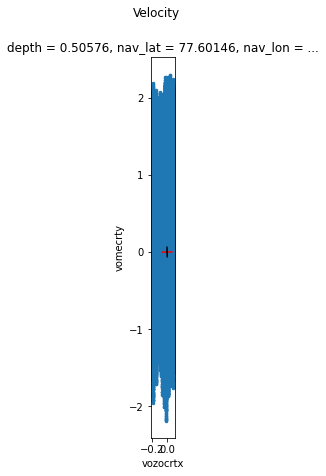

In [41]:
n = 0
fm, value_list = eigen_func(A,n)


#plot the data 
fig = plt.figure(figsize=(7, 7))
fig.suptitle('Velocity')
plt.xlabel('U')
plt.ylabel('V')

rådata_c.isel(depth=0, time_counter=slice(0,72)).plot.scatter(x='vozocrtx', y='vomecrty', s=6)

plt.plot([0,fm[0,0]*np.sqrt(value_list[0,0])],[0,fm[1,0]*np.sqrt(value_list[0,0])],'r') #PC1 
plt.plot([0,fm[0,0]*np.sqrt(value_list[0,0])*(-1)],[0,fm[1,0]*np.sqrt(value_list[0,0])*(-1)],'r')
plt.plot([0,fm[0,1]*np.sqrt(value_list[1,0])],[0,fm[1,1]*np.sqrt(value_list[1,0])],'k') #PC2
plt.plot([0,fm[0,1]*np.sqrt(value_list[1,0])*(-1)],[0,fm[1,1]*np.sqrt(value_list[1,0])*(-1)],'k')

plt.axes().set_aspect('equal')

vector_list:  (75, 2, 2)
value_list:  (75, 2)


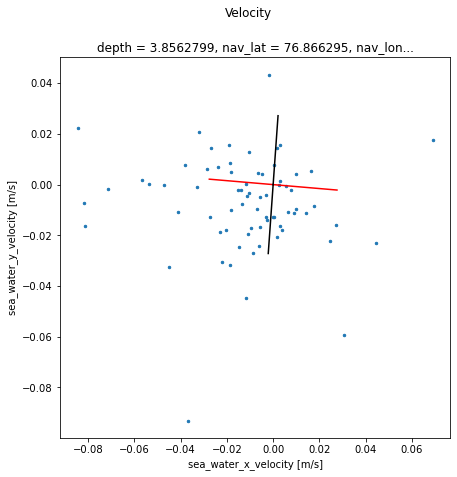

In [20]:
'same point, just depth level 3'
n = 3
fm, value_list = eigen_func(A,n)


#plot the data 
fig = plt.figure(figsize=(7, 7))
fig.suptitle('Velocity')
plt.xlabel('U')
plt.ylabel('V')

rådata.isel(depth=n, time_counter=slice(0,72)).plot.scatter(x='vozocrtx', y='vomecrty', s=6)

plt.plot([0,fm[0,0]*np.sqrt(value_list[0,0])],[0,fm[1,0]*np.sqrt(value_list[0,0])],'r') #PC1 
plt.plot([0,fm[0,0]*np.sqrt(value_list[0,0])*(-1)],[0,fm[1,0]*np.sqrt(value_list[0,0])*(-1)],'r')
plt.plot([0,fm[0,1]*np.sqrt(value_list[1,0])],[0,fm[1,1]*np.sqrt(value_list[1,0])],'k') #PC2
plt.plot([0,fm[0,1]*np.sqrt(value_list[1,0])*(-1)],[0,fm[1,1]*np.sqrt(value_list[1,0])*(-1)],'k')

vector_list:  (75, 2, 2)
value_list:  (75, 2)
[[ 0.99958074 -0.02895398]
 [ 0.02895398  0.99958074]]


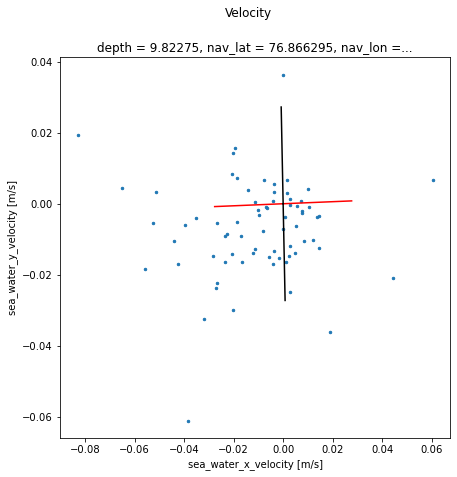

In [21]:
'same point, just depth level 7'
n = 7
fm, value_list = eigen_func(A,n)
print(fm)

#plot the data 
fig = plt.figure(figsize=(7, 7))
fig.suptitle('Velocity')
plt.xlabel('U')
plt.ylabel('V')

rådata.isel(depth=n, time_counter=slice(0,72)).plot.scatter(x='vozocrtx', y='vomecrty', s=6)

plt.plot([0,fm[0,0]*np.sqrt(value_list[0,0])],[0,fm[1,0]*np.sqrt(value_list[0,0])],'r') #PC1 
plt.plot([0,fm[0,0]*np.sqrt(value_list[0,0])*(-1)],[0,fm[1,0]*np.sqrt(value_list[0,0])*(-1)],'r')
plt.plot([0,fm[0,1]*np.sqrt(value_list[1,0])],[0,fm[1,1]*np.sqrt(value_list[1,0])],'k') #PC2
plt.plot([0,fm[0,1]*np.sqrt(value_list[1,0])*(-1)],[0,fm[1,1]*np.sqrt(value_list[1,0])*(-1)],'k')

vector_list:  (75, 2, 2)
value_list:  (75, 2)
[[ 0.83060247 -0.55686581]
 [ 0.55686581  0.83060247]]


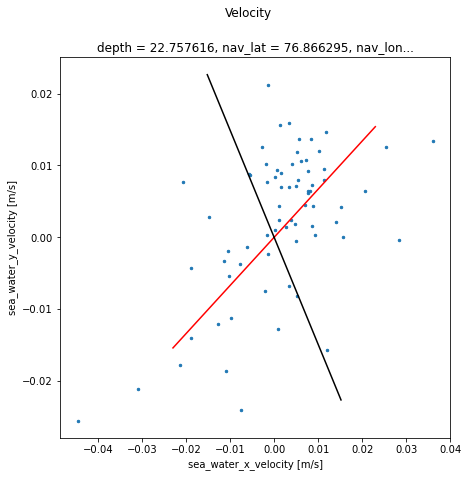

In [23]:
'same point, just depth level 12'
n = 12
fm, value_list = eigen_func(A,n)
print(fm)

#plot the data 
fig = plt.figure(figsize=(7, 7))
fig.suptitle('Velocity')
plt.xlabel('U')
plt.ylabel('V')

rådata.isel(depth=n, time_counter=slice(0,72)).plot.scatter(x='vozocrtx', y='vomecrty', s=6, )

plt.plot([0,fm[0,0]*np.sqrt(value_list[0,0])],[0,fm[1,0]*np.sqrt(value_list[0,0])],'r') #PC1 
plt.plot([0,fm[0,0]*np.sqrt(value_list[0,0])*(-1)],[0,fm[1,0]*np.sqrt(value_list[0,0])*(-1)],'r')
plt.plot([0,fm[0,1]*np.sqrt(value_list[1,0])],[0,fm[1,1]*np.sqrt(value_list[1,0])],'k') #PC2
plt.plot([0,fm[0,1]*np.sqrt(value_list[1,0])*(-1)],[0,fm[1,1]*np.sqrt(value_list[1,0])*(-1)],'k')

Second location 

In [24]:
x = 800+200
y = 160+800


In [73]:
u.shape

(72, 75, 1801, 1580)

In [25]:
u = du.vozocrtx[:,:,y,x]
v = dv.vomecrty[:,:,y,x]
vvar = dset.vomecrty[:,y,x]
uvar = dset.vozocrtx[:,y,x]
covar = dset.vel[:,y,x]

#u_B = u.to_dataset()
#v_B = v.to_dataset()
#rådata_B = xr.merge([u,v], compat='override')

In [93]:
uvar

<xarray.DataArray 'vozocrtx' (depth: 75)>
dask.array<getitem, shape=(75,), dtype=float32, chunksize=(75,), chunktype=numpy.ndarray>
Coordinates:
  * depth          (depth) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    time_centered  object ...
    time_counter   object ...
    nav_lat        float32 dask.array<chunksize=(), meta=np.ndarray>
    nav_lon        float32 dask.array<chunksize=(), meta=np.ndarray>

In [95]:
covar

<xarray.DataArray 'vel' (depth: 75)>
dask.array<getitem, shape=(75,), dtype=float32, chunksize=(75,), chunktype=numpy.ndarray>
Coordinates:
  * depth          (depth) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    time_centered  object ...
    time_counter   object ...
    nav_lat        float32 dask.array<chunksize=(), meta=np.ndarray>
    nav_lon        float32 dask.array<chunksize=(), meta=np.ndarray>

In [98]:
vvar

<xarray.DataArray 'vomecrty' (depth: 75)>
dask.array<getitem, shape=(75,), dtype=float32, chunksize=(75,), chunktype=numpy.ndarray>
Coordinates:
  * depth          (depth) float32 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    time_centered  object ...
    time_counter   object ...
    nav_lat        float32 dask.array<chunksize=(), meta=np.ndarray>
    nav_lon        float32 dask.array<chunksize=(), meta=np.ndarray>

In [26]:
#covariance matrix
B = xr.DataArray([[uvar,covar],[covar,vvar]], dims=["i", "j", "depth"])

In [27]:
B

<xarray.DataArray (i: 2, j: 2, depth: 75)>
array([[[ 3.7402911e-03,  3.7371512e-03,  3.7231022e-03,  3.6977180e-03,
          3.6601122e-03,  3.6091250e-03,  3.5600993e-03,  3.5149539e-03,
          3.4783073e-03,  3.4478093e-03,  3.4198896e-03,  3.3918596e-03,
          3.3537894e-03,  3.2923282e-03,  3.2011569e-03,  3.0907469e-03,
          2.9864272e-03,  2.9014209e-03,  2.8259214e-03,  2.7560238e-03,
          2.6977502e-03,  2.6414162e-03,  2.6088969e-03,  2.5844239e-03,
          2.5508753e-03,  2.5160210e-03,  2.4731662e-03,  2.4318497e-03,
          2.3800388e-03,  2.3235409e-03,  2.2431586e-03,  2.1593585e-03,
          2.0817711e-03,  2.0123546e-03,  1.9423553e-03,  1.8659427e-03,
          1.7962856e-03,  1.7271105e-03,  1.6513871e-03,  1.5817175e-03,
          1.5283062e-03,  1.4802058e-03,  1.4088440e-03,  1.2733538e-03,
          1.0194464e-03,  6.8185717e-04,  3.6734814e-04,  1.5814712e-04,
          5.3301454e-05,  1.3327581e-05,  1.8825897e-06,  1.0110375e-06,
          7.4617788e-07,  9.0269356e-07,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-5.3882541e-04, -5.4037932e-04, -5.3669570e-04, -5.2386185e-04,
...
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 4.9840803e-03,  4.9650138e-03,  4.9472195e-03,  4.9289190e-03,
          4.9050297e-03,  4.8764725e-03,  4.8324480e-03,  4.7768392e-03,
          4.7156583e-03,  4.6538883e-03,  4.5943097e-03,  4.5375284e-03,
          4.4817394e-03,  4.4267350e-03,  4.3708533e-03,  4.3122326e-03,
          4.2504240e-03,  4.1910321e-03,  4.1371360e-03,  4.0899240e-03,
          4.0386254e-03,  3.9664339e-03,  3.8783604e-03,  3.7932892e-03,
          3.7006976e-03,  3.6109379e-03,  3.5164147e-03,  3.4137643e-03,
          3.3088517e-03,  3.2003256e-03,  3.0622778e-03,  2.8835095e-03,
          2.7415049e-03,  2.5779598e-03,  2.4225060e-03,  2.2608689e-03,
          2.1140345e-03,  1.9800053e-03,  1.8610504e-03,  1.7532762e-03,
          1.6387597e-03,  1.5640416e-03,  1.4908117e-03,  1.3887128e-03,
          1.2010173e-03,  9.2341221e-04,  5.9158530e-04,  2.9656512e-04,
          1.2333324e-04,  5.0470197e-05,  9.8601668e-06,  3.3481190e-06,
          1.9424724e-06,  1.6349912e-06,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00]]], dtype=float32)
Dimensions without coordinates: i, j, depth

In [28]:
'Function to calculate the eigenvalues, eigenvector an the featuring matrix for given level'

def eigen_func(covmatrix, level):

    #eigenvectors and eigenvalues
    value_list = np.zeros((75,2))
    vector_list = np.zeros((75,2,2))

    for i in range(len(covmatrix.depth)):
        values, vectors = np.linalg.eig(covmatrix[:,:,i])
        print('vectors:  ', vectors)
        print('values:  ',values)
        value_list[i] = values
        vector_list[i] = vectors               

    #print(vector_list.shape)
    #print(value_list.shape)

    #Feature vectors chosen from the eigenvectors I want to keep with the highest corresponding eigenvalue
    fm = np.array([vector_list[level,0,:],vector_list[level,1,:]])
    #print(fm[:,0])
    #print(fm[:,1])
    
    return fm

In [90]:
vector_list.shape

(75, 2, 2)

In [89]:
fm.shape

(2, 2)

vectors:   [[-0.93695766  0.34944296]
 [-0.34944296 -0.93695766]]
values:   [0.00353933 0.00518504]
vectors:   [[-0.9355856  0.3530999]
 [-0.3530999 -0.9355856]]
values:   [0.00353321 0.00516896]
vectors:   [[-0.93591654  0.35222182]
 [-0.35222182 -0.93591654]]
values:   [0.00352112 0.0051492 ]
vectors:   [[-0.938502    0.34527376]
 [-0.34527376 -0.938502  ]]
values:   [0.00350499 0.00512165]
vectors:   [[-0.9433412   0.33182424]
 [-0.33182424 -0.9433412 ]]
values:   [0.00348433 0.00508081]
vectors:   [[-0.9501198  0.3118852]
 [-0.3118852 -0.9501198]]
values:   [0.00345607 0.00502953]
vectors:   [[-0.9557287   0.29424918]
 [-0.29424918 -0.9557287 ]]
values:   [0.00342686 0.00496568]
vectors:   [[-0.9602001   0.27931315]
 [-0.27931315 -0.9602001 ]]
values:   [0.00339831 0.00489349]
vectors:   [[-0.96334136  0.26827866]
 [-0.26827866 -0.96334136]]
values:   [0.00337428 0.00481969]
vectors:   [[-0.96526897  0.2612582 ]
 [-0.2612582  -0.96526897]]
values:   [0.00335247 0.00474922]
vectors:

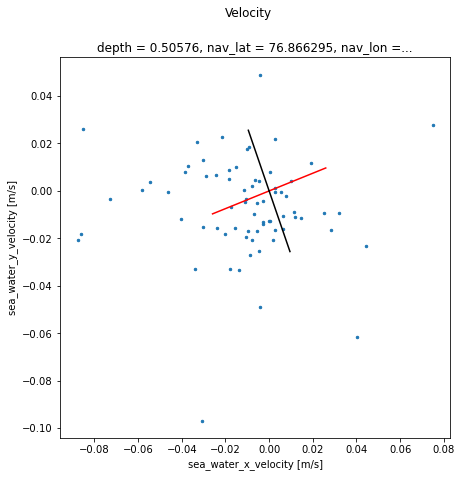

In [29]:
'Point B (see x,y) and level n'

n = 0 
fm_B = eigen_func(B,n)

#plot the data 
fig = plt.figure(figsize=(7, 7))
fig.suptitle('Velocity')
plt.xlabel('U')
plt.ylabel('V')

rådata.isel(depth=n, time_counter=slice(0,72)).plot.scatter(x='vozocrtx', y='vomecrty', s=6)

plt.plot([0,fm_B[0,0]*np.sqrt(value_list[0,0])],[0,fm_B[1,0]*np.sqrt(value_list[0,0])],'r') #PC1 
plt.plot([0,fm_B[0,0]*np.sqrt(value_list[0,0])*(-1)],[0,fm_B[1,0]*np.sqrt(value_list[0,0])*(-1)],'r')
plt.plot([0,fm_B[0,1]*np.sqrt(value_list[1,0])],[0,fm_B[1,1]*np.sqrt(value_list[1,0])],'k') #PC2
plt.plot([0,fm_B[0,1]*np.sqrt(value_list[1,0])*(-1)],[0,fm_B[1,1]*np.sqrt(value_list[1,0])*(-1)],'k')


vectors:   [[-0.93695766  0.34944296]
 [-0.34944296 -0.93695766]]
values:   [0.00353933 0.00518504]
vectors:   [[-0.9355856  0.3530999]
 [-0.3530999 -0.9355856]]
values:   [0.00353321 0.00516896]
vectors:   [[-0.93591654  0.35222182]
 [-0.35222182 -0.93591654]]
values:   [0.00352112 0.0051492 ]
vectors:   [[-0.938502    0.34527376]
 [-0.34527376 -0.938502  ]]
values:   [0.00350499 0.00512165]
vectors:   [[-0.9433412   0.33182424]
 [-0.33182424 -0.9433412 ]]
values:   [0.00348433 0.00508081]
vectors:   [[-0.9501198  0.3118852]
 [-0.3118852 -0.9501198]]
values:   [0.00345607 0.00502953]
vectors:   [[-0.9557287   0.29424918]
 [-0.29424918 -0.9557287 ]]
values:   [0.00342686 0.00496568]
vectors:   [[-0.9602001   0.27931315]
 [-0.27931315 -0.9602001 ]]
values:   [0.00339831 0.00489349]
vectors:   [[-0.96334136  0.26827866]
 [-0.26827866 -0.96334136]]
values:   [0.00337428 0.00481969]
vectors:   [[-0.96526897  0.2612582 ]
 [-0.2612582  -0.96526897]]
values:   [0.00335247 0.00474922]
vectors:

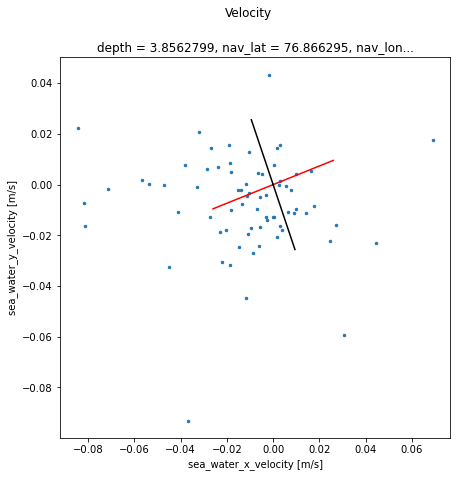

In [30]:
n = 3 
fm_B = eigen_func(B,n)

#plot the data 
fig = plt.figure(figsize=(7, 7))
fig.suptitle('Velocity')
plt.xlabel('U')
plt.ylabel('V')

rådata.isel(depth=n, time_counter=slice(0,72)).plot.scatter(x='vozocrtx', y='vomecrty', s=6)

plt.plot([0,fm_B[0,0]*np.sqrt(value_list[0,0])],[0,fm_B[1,0]*np.sqrt(value_list[0,0])],'r') #PC1 
plt.plot([0,fm_B[0,0]*np.sqrt(value_list[0,0])*(-1)],[0,fm_B[1,0]*np.sqrt(value_list[0,0])*(-1)],'r')
plt.plot([0,fm_B[0,1]*np.sqrt(value_list[1,0])],[0,fm_B[1,1]*np.sqrt(value_list[1,0])],'k') #PC2
plt.plot([0,fm_B[0,1]*np.sqrt(value_list[1,0])*(-1)],[0,fm_B[1,1]*np.sqrt(value_list[1,0])*(-1)],'k')


vectors:   [[-0.93695766  0.34944296]
 [-0.34944296 -0.93695766]]
values:   [0.00353933 0.00518504]
vectors:   [[-0.9355856  0.3530999]
 [-0.3530999 -0.9355856]]
values:   [0.00353321 0.00516896]
vectors:   [[-0.93591654  0.35222182]
 [-0.35222182 -0.93591654]]
values:   [0.00352112 0.0051492 ]
vectors:   [[-0.938502    0.34527376]
 [-0.34527376 -0.938502  ]]
values:   [0.00350499 0.00512165]
vectors:   [[-0.9433412   0.33182424]
 [-0.33182424 -0.9433412 ]]
values:   [0.00348433 0.00508081]
vectors:   [[-0.9501198  0.3118852]
 [-0.3118852 -0.9501198]]
values:   [0.00345607 0.00502953]
vectors:   [[-0.9557287   0.29424918]
 [-0.29424918 -0.9557287 ]]
values:   [0.00342686 0.00496568]
vectors:   [[-0.9602001   0.27931315]
 [-0.27931315 -0.9602001 ]]
values:   [0.00339831 0.00489349]
vectors:   [[-0.96334136  0.26827866]
 [-0.26827866 -0.96334136]]
values:   [0.00337428 0.00481969]
vectors:   [[-0.96526897  0.2612582 ]
 [-0.2612582  -0.96526897]]
values:   [0.00335247 0.00474922]
vectors:

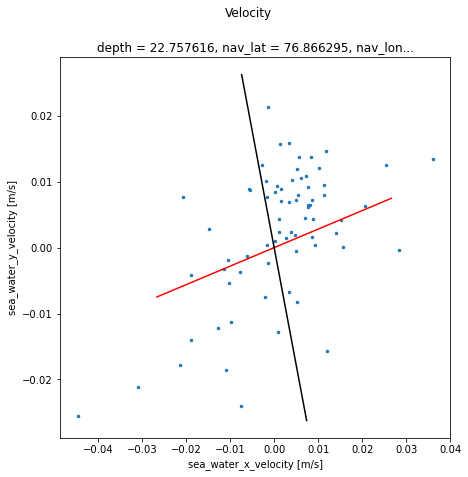

In [31]:
n = 12 
fm_B = eigen_func(B,n)

#plot the data 
fig = plt.figure(figsize=(7, 7))
fig.suptitle('Velocity')
plt.xlabel('U')
plt.ylabel('V')

rådata.isel(depth=n, time_counter=slice(0,72)).plot.scatter(x='vozocrtx', y='vomecrty', s=6)

plt.plot([0,fm_B[0,0]*np.sqrt(value_list[0,0])],[0,fm_B[1,0]*np.sqrt(value_list[0,0])],'r') #PC1 
plt.plot([0,fm_B[0,0]*np.sqrt(value_list[0,0])*(-1)],[0,fm_B[1,0]*np.sqrt(value_list[0,0])*(-1)],'r')
plt.plot([0,fm_B[0,1]*np.sqrt(value_list[1,0])],[0,fm_B[1,1]*np.sqrt(value_list[1,0])],'k') #PC2
plt.plot([0,fm_B[0,1]*np.sqrt(value_list[1,0])*(-1)],[0,fm_B[1,1]*np.sqrt(value_list[1,0])*(-1)],'k')

plt.axes().set_aspect('equal')
